**Bixi Filter Regions of Interest**

In [2]:
import pandas as pd
from shapely.geometry import Point, Polygon
import geopandas as gpd
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objs as go
from plotly.tools import FigureFactory as FF

bixi = pd.read_csv('Stations_2019.csv')

#adjust these points to adjust the boundaries of the polygon 
N = (-73.571803, 45.518931) #pin/st. denis
W = (-73.584395, 45.505730) #pin/peel
S = (-73.566741, 45.496835) #peel/st. antoine
E = (-73.554537, 45.511056) #viger/st. denis 
coords = [N,W,S,E]
bixi_region = Polygon(coords)

#position of warehouse 
warehouse = Point(-73.601962, 45.529709)

**Area of region of interest**

In [3]:
import pyproj
from shapely.geometry import shape
from shapely.ops import transform
from functools import partial

geom = {'type': 'Polygon',
        'coordinates': [[[-73.571803, 45.518931], [-73.584395, 45.505730],
                         [-73.566741, 45.496835], [-73.554537, 45.511056]]]}

s = shape(geom)
proj = partial(pyproj.transform, pyproj.Proj(init='epsg:4326'),
               pyproj.Proj(init='epsg:3857'))

s_new = transform(proj, s)

projected_area = transform(proj, s).area
print('area in sq km', projected_area/1000000)

area in sq km 6.071280248620024


**Calcualate Region of Interest**

In [4]:
#transform lat and longs from bixi data into point coordinates
stations = pd.DataFrame(columns = ['Coords'], index = range(len(bixi)))
stations_list = []
for i in range(len(bixi)):
    stations_list.append(Point(bixi['longitude'][i],bixi['latitude'][i]))
stations['Coords'] = stations_list

#calculate if a station is in or out of the region 
within_polygon = []
for i in range(len(stations)):
    within_polygon.append(stations['Coords'][i].within(bixi_region))
bixi['Within_Region'] = within_polygon

In [6]:
#number of stations within desired region
bixi.groupby('Within_Region').count()

,Code,name,latitude,longitude
Within_Region,,,,
False,561,561,561,561
True,58,58,58,58


In [7]:
#filter to stations only within region and rename column
bixi_filtered = bixi[bixi['Within_Region'] == True].rename(columns={"Code": "start_station_code"})
bixi_filtered.head(3)

,start_station_code,name,latitude,longitude,Within_Region
10,6001,Métro Champ-de-Mars (Viger / Sanguinet),45.510351,-73.556508,True
12,6003,Clark / Evans,45.511007,-73.567602,True
14,6005,Metcalfe / du Square-Dorchester,45.500208,-73.571138,True


**Map of Problem**

In [8]:
gpd.io.file.fiona.drvsupport.supported_drivers['KML'] = 'rw'

In [20]:
cycle_map = gpd.read_file('reseau_cyclable.kml', driver = 'KML')
basemap = gpd.read_file('limadmin.kml', driver = 'KML')

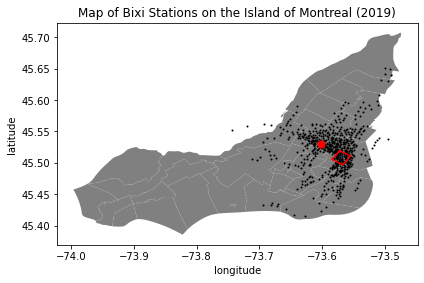

In [39]:
fig, ax = plt.subplots()

#basemaps 
#cycle_map.plot(ax=ax, facecolor='white', alpha = 0.2)
basemap.plot(ax=ax, facecolor = 'grey')

#region of interest 
x,y = bixi_region.exterior.xy
plt.plot(x,y, color = 'red')

#bixi stations 
plt.scatter(bixi['longitude'],  bixi['latitude'], color = 'black', s = 1)
plt.xlabel("longitude")
plt.ylabel("latitude")
plt.title('Map of Bixi Stations on the Island of Montreal (2019)')
plt.tight_layout()
plt.show()

In [101]:
#revenue per week, for a given month ('revenue')

for j in range(len(months)):
    w1 = []
    w2 = []
    w3 = []
    w4 = []
    for i in range(len(revenue)):
        if (int(revenue['start_date'][1][5:7]) == 10) & (int(revenue['start_date'][i][8:10]) <= 7): #1-7
            w1.append(revenue['cost'][i])
        if (int(revenue['start_date'][1][5:7]) == 10) & (int(revenue['start_date'][i][8:10]) <= 14): #8-14
            w2.append(revenue['cost'][i])
        elif (int(revenue['start_date'][1][5:7]) == 10) & (int(revenue['start_date'][i][8:10]) <= 21): #15-21
            w3.append(revenue['cost'][i])
        else: #22-30/31
            w4.append(revenue['cost'][i])
    print('month:', m[j])
    print(sum(w1))
    print(sum(w2))
    print(sum(w3))
    print(sum(w4))

month: april
26954.369999994375
58928.71999997864
25047.1249999949
36349.68999999067
month: may
26954.369999994375
58928.71999997864
25047.1249999949
36349.68999999067
month: june
26954.369999994375
58928.71999997864
25047.1249999949
36349.68999999067
month: july
26954.369999994375
58928.71999997864
25047.1249999949
36349.68999999067
month: august
26954.369999994375
58928.71999997864
25047.1249999949
36349.68999999067
month: september
26954.369999994375
58928.71999997864
25047.1249999949
36349.68999999067
month: october
26954.369999994375
58928.71999997864
25047.1249999949
36349.68999999067


In [25]:
#fuel cost
(112.1+113.6+126.3+136.0+137.9+128.5+133.3+125.1+123.9+123.6+123.5+123.5)/12

125.60833333333333

**Membership Revenue**
- Calculate the number of members and the revenue from membership
- Calculate the number of member rides taken during the season 
- Divide the number of members by the number of rides taken per season to get an average base rate for each member ride

In [44]:
membership_revenue = (4541+13488+10620+6697+5622+3817+2709+920)*97
member_rides = 206736 + 663738+756027+892272+828313+733360+545186
membership_revenue/member_rides

1.0152467814127886